# HW #7
> 2022094093 Dohoon Kim, Dept of Data Science

### Question 1 : Naive Bayes

In [49]:
# Import Modules
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

In [29]:
# Prepare Data
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
# Set Categories, and make train and test datasets
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print("train data count: ", len(train.data))

train data count:  1789


In [31]:
### Check data
print(train.data[5]) # the features => article
print('_______________________________')
print(train.target_names[train.target[5]]) # the target_name => Label

From: jkjec@westminster.ac.uk (Shazad Barlas)
Subject: Re: Manual Shift Bigots wanted
Organization: University of Westminster
Lines: 7

The best auto-shifters on the street (AND NOT THE TRACK) are those from 
Porsche... they wont change if you floor the gas during a turn.... a few 
years back a was in a 200SX auto (you guys call it a 240SX [without turbo])
and was going round a corner.... I floored it and next thing I know I was 
pointing backwards! The other drivers seemed quite amused ;-)

						....Shaz....

_______________________________
rec.autos


In [32]:
# Define Model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

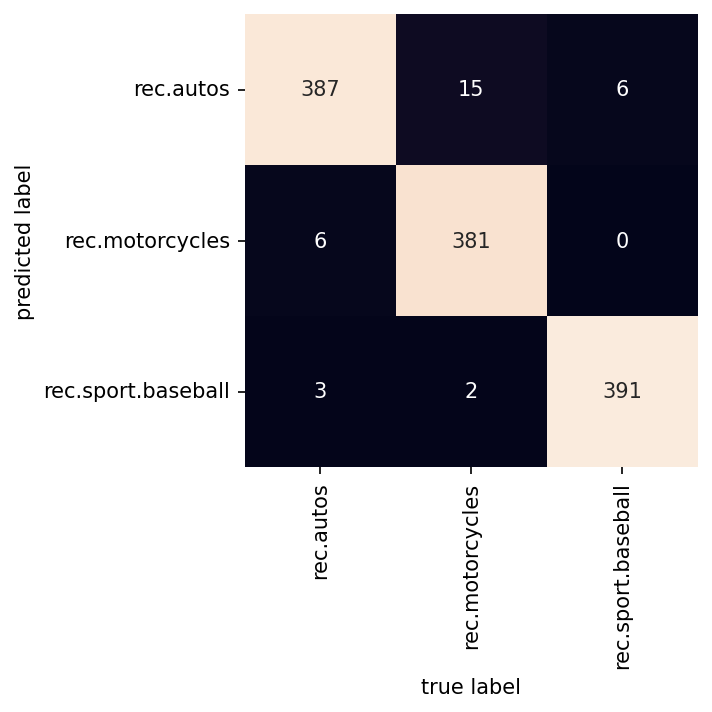

In [51]:
# Plot Result
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig("confusion_matrix.jpg")

In [35]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [38]:
# CHECK !!!
predict_sentences = ['Take me out to the ball game',
                    'I want to ride my bicycle, bicycle, bicycle',
                    'Nobody going to beat my car. It is going to break the speed of sound']

for i in predict_sentences:
    pred = predict_category(i)
    print(f"____________________________________\n{i}\n -> {pred}")

____________________________________
Take me out to the ball game
 -> rec.sport.baseball
____________________________________
I want to ride my bicycle, bicycle, bicycle
 -> rec.motorcycles
____________________________________
Nobody going to beat my car. It is going to break the speed of sound
 -> rec.autos


### Question 2 : K-Means

In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 150
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
data_X = dfX[["RM", "AGE"]]


/Users/tt/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [2]:
data_X

,RM,AGE
0,6.575,65.2
1,6.421,78.9
2,7.185,61.1
3,6.998,45.8
4,7.147,54.2
...,...,...
501,6.593,69.1
502,6.120,76.7
503,6.976,91.0
504,6.794,89.3


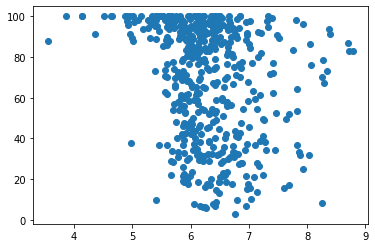

In [55]:
plt.scatter(data_X['RM'], data_X['AGE'])
# plt.savefig("scatter.jpg")

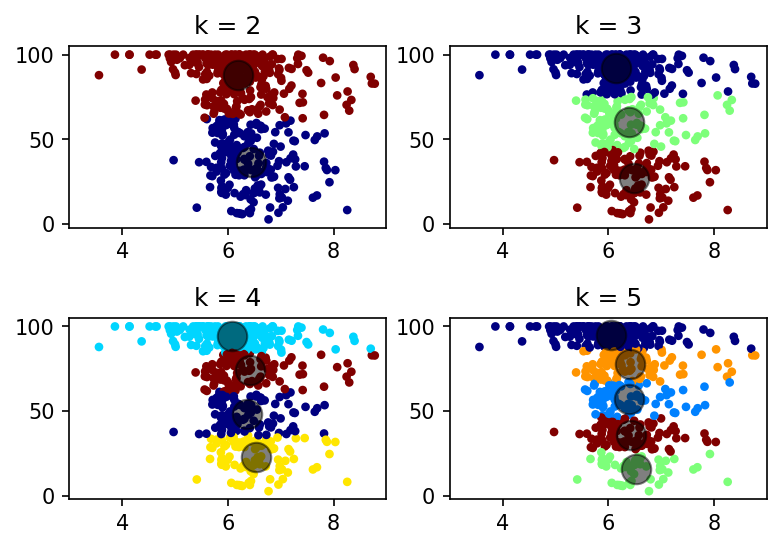

In [3]:
### Plot them 
### for k := 2 to 5
for i in range (2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_X)
    y_kmeans = kmeans.predict(data_X)
    plt.subplot(2, 2, i-1)
    plt.scatter(data_X['RM'], data_X['AGE'],c=y_kmeans, s=10, cmap='jet')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title(f"k = {i}")
    plt.xlim(3,9)
    plt.subplots_adjust(hspace=.5)
# plt.savefig("Kmeans.jpg")

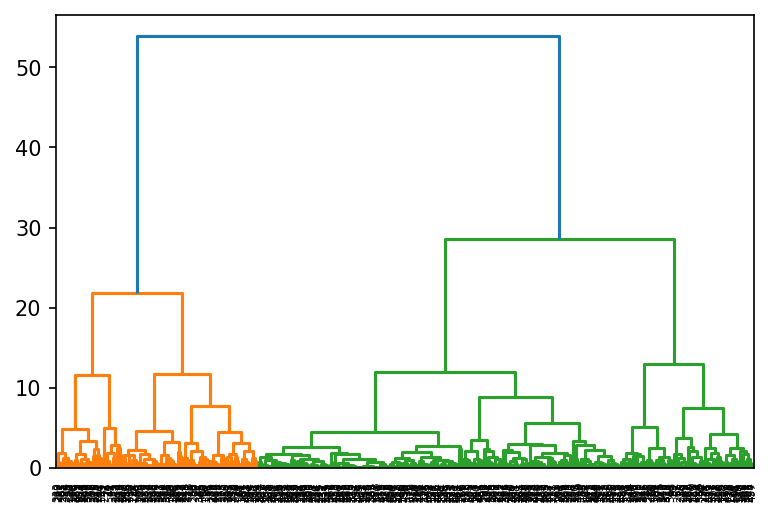

In [4]:
clustered_data  = sch.linkage(data_X, method  = "average")
dendrogram = sch.dendrogram(clustered_data)
# plt.savefig("dendrogram.jpg")

In [27]:
#### To predict


cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
#cluster.fit_predict(X)
cluster.fit_predict(np.array([[-1, 8], [-1, 2], [1, 4], [2, 1]]))

array([3, 1, 2, 0])